# EXPLORATORY DATA ANALYSIS

In this Notebook, we will be exploring a dataset from Kaggle on Telco Customer churn (https://www.kaggle.com/blastchar/telco-customer-churn).

# OBJECTIVES

We will be training a Support Vector Classifier and a RandomForest Classifier algorithms for predicting which customer will churn based on the given dataset.

#### Columns of the data
- CustomerID = Customer ID
- Gender Customer = gender (female, male)
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- Tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

In [2]:
%run future_encoders

Loading the Datasets.
Let's have a look at the first 5 and the last 5 rows of the dataset

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

From the info, We are glad there is no missing data in any of the columns. Each columns has 7,043 objects in each.
#### What else can we say about the data

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


From the above, **SeniorCitizen** column is a categorical variable presented in a (0,1). **Tenure and MonthlyCharges** are the numerical variables in the dataset.

Let's learn more about our dataset

In [7]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

From above, we can see that 1,869 customers churned out of the 7,043 in the dataset and this is our target variables.
We will have to convert this to Hot encoders and represent the data in (1,0) for the customers that churned and the ones that didn.t.

In [8]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [9]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [10]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [11]:
df["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
     ... 
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58     67
49     66
43     65
42     65
31     65
34     65
37     65
57     65
55     64
40     64
48     64
33     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [12]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

We have 18 columns with categorical variables, and we will be building a transformation pipeline to turn it to OneHotEncoder for machine learning.

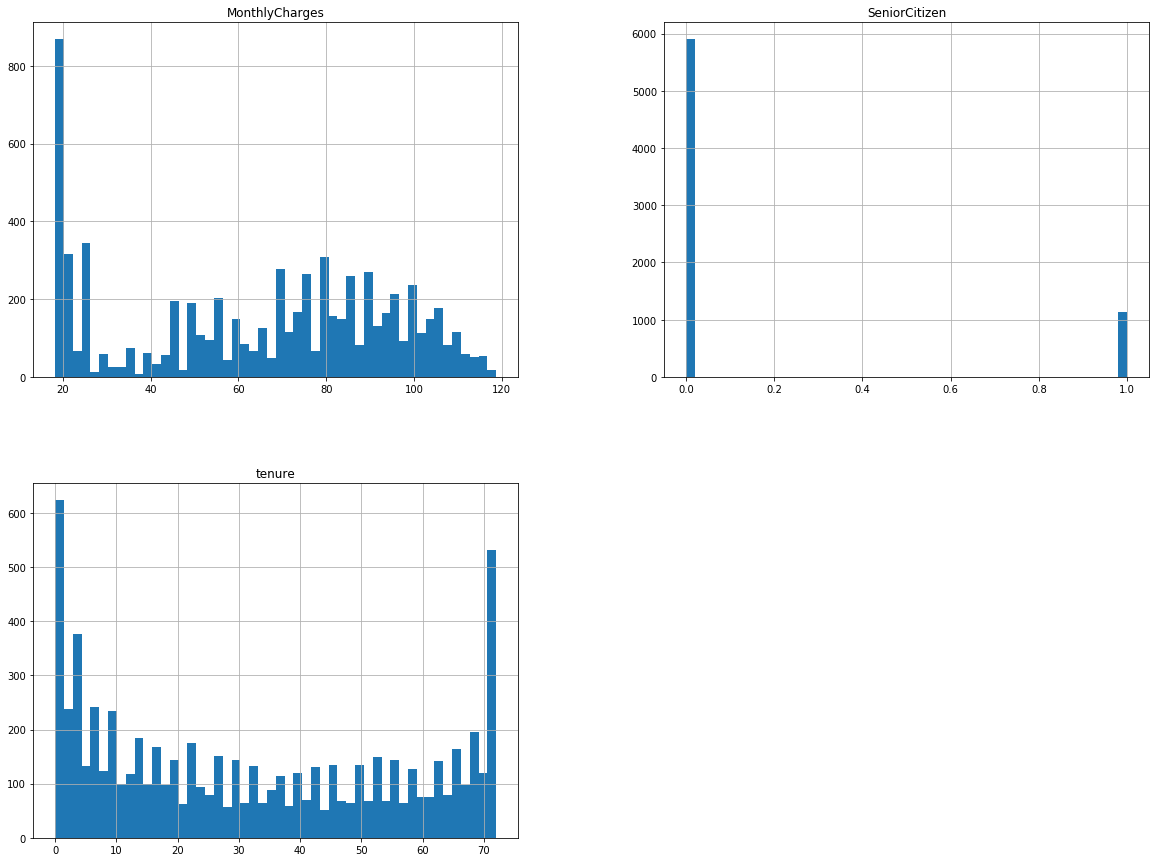

In [13]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [33]:
corr_matrix = df.corr()
corr_matrix["tenure"].sort_values(ascending=False)

tenure            1.000000
MonthlyCharges    0.247900
SeniorCitizen     0.016567
Name: tenure, dtype: float64

Importing Dataframes to handle categorical variable.

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

## Data cleaning for Machine Learning Algorithms.
- We will be converting our categorical values to OneHotEncoders for machine learning.
- We will employ some data variables from Ageron's Hands on Machine learning'

In [15]:
# From Hands on Machine learning by Ageron
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

Before we proceed too far, let us split our data into test and train sets

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

Building Pipelines for the categorical attributes and using OneHotEncoder to convert them to One-hot Vector

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["gender", "SeniorCitizen", "Partner", "Dependents",
                                     "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
                                     "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                                     "Contract", "PaperlessBilling", "PaymentMethod", "TotalCharges"])),
    ("imputer", MostFrequentImputer()),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [18]:
cat_pipeline.fit_transform(train_set)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Building numerical attributes pipeline

In [19]:
imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["tenure", "MonthlyCharges"])),
    ("imputer", Imputer(strategy="median"))
])

In [20]:
num_pipeline.fit_transform(train_set)

array([[21.  , 64.85],
       [54.  , 97.2 ],
       [ 1.  , 23.45],
       ...,
       [12.  , 21.15],
       [12.  , 99.45],
       [26.  , 19.8 ]])

Joiniing the two pielines together

In [21]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

We have preprocessed our datasets using the pipelines

In [22]:
X_train = preprocess_pipeline.fit_transform(train_set)
X_train

array([[21.  , 64.85,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [54.  , 97.2 ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  , 23.45,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [12.  , 21.15,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [12.  , 99.45,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [26.  , 19.8 ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [23]:
# Gettiing our Labes
y_train = train_set["Churn"]

TRAINING A CLASSIFIER MODEL

In [28]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Great Our SVC model hs been trained....let's see how accurate are it's predictions

In [29]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7861204943482482

We can also look at another model and see how well they will perform.

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.7738596492171854

In [36]:
corr_matrix = np.corrcoef(X_train)
#corr_matrix["churn"].sort_values(ascending=False)

#### Conclusively, we can see that the SVC model did better in this dataset compared to the RandomForestClassifier. Don't forget that you can contribute to this Notebook by training this dataset with Neural nets and deep learning, would be most glad to welcome all you inputs.